In [2]:
#load libraries and setup file
import sys,os
root_path = os.path.abspath(os.path.join('..'))
print(root_path)
if root_path not in sys.path:
    sys.path.append(root_path)
%run -i "../lib/utils/ipynb_setup.py"
%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/mptouzel/Dropbox/scripts/Projects/topicmod/code


ModuleNotFoundError: No module named 'scipy'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
#plotting
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style("ticks", {'axes.grid' : True})
# pl.rc("figure", facecolor="white",figsize = (8,8))
pl.rc("figure", facecolor="gray",figsize = (8,8))
pl.rc('text', usetex=True)
pl.rc('text.latex', preamble=[r'\usepackage{amsmath}'])
pl.rc('lines',markeredgewidth = 2)
pl.rc('font',size = 12)

In [22]:
fig_dir='../../output/figures/'
data_dir='../../output/data/'

import data

In [23]:
df=pd.read_stata('../../data/carbon_tax/CCOP_wave1.dta')
print(df.columns.values)
df.head()

['responseid' 'status' 'intcode' 'interview_start' 'interview_end'
 'temptime' 'lang' 'prov' 'd1' 'd3' 'age' 'qmip' 'qmip_01' 'qmip_02'
 'qmip_03' 'qmip_04' 'qmip_05' 'qmip_06' 'qmip_07' 'qmip_08' 'qmip_09'
 'qmip_10' 'qmip_11' 'qmip_12' 'qmip_13' 'qmip_14' 'qmip_15' 'qmip_16'
 'qmip_17' 'qmip_18' 'qmip_19' 'qmip_20' 'qmip_21' 'qmip_22' 'qmip_96'
 'qmip_98' 'p1' 'p2_1' 'p2_2' 'p2_3' 'p2_4' 'p2_5' 'p2_6' 'p2_7' 'p2_8'
 'p3_1' 'p3_2' 'p3_3' 'p3_4' 'p3_5' 'p4a_1' 'p4a_2' 'p4a_3' 'p4a_4'
 'p4a_5' 'p4b_6' 'p4b_7' 'p4b_8' 'p4b_9' 'p4b_10' 'p4b_11' 'pk1' 'pk2'
 'e2' 'e5' 'e6' 'e7' 'e8' 'a1' 'a2' 'a3' 'a4' 'a5' 'po1' 'po2' 'po3a'
 'po3a_01' 'po3a_02' 'po3a_03' 'po3a_04' 'po3a_05' 'po3a_06' 'po3a_07'
 'po3a_08' 'po3a_09' 'po3a_10' 'po3a_11' 'po3a_12' 'po3a_13' 'po3a_14'
 'po3a_15' 'po3a_16' 'po3a_17' 'po3a_18' 'po3a_19' 'po3a_96' 'po3a_97'
 'po3a_98' 'po3b' 'po3b_01' 'po3b_02' 'po3b_03' 'po3b_04' 'po3b_05'
 'po3b_06' 'po3b_07' 'po3b_08' 'po3b_09' 'po3b_10' 'po3b_11' 'po3b_12'
 'po3b_13' 'po3b_1

,responseid,status,intcode,interview_start,interview_end,temptime,lang,prov,d1,d3,...,d7,d8,d10,d11,d12,d13,d14,immig,kids,Weight
0,27,complete,C1,2019-02-22 11:27:04,2019-02-22 11:54:52,1665,EN,ON,Male,63,...,0,2,"Within a suburb, adjacent to a large city",8,College / CEGEP graduate,This doesn't apply to me,"$40,000-$59,999","No, Born in Canada",No,2.389879
1,28,complete,C1,2019-02-22 11:27:07,2019-02-22 11:35:38,508,EN,ON,Male,31,...,2,2,"Within a suburb, adjacent to a large city",8,Post-graduate university degree,Drive alone,"$200,000 or more","No, Born in Canada",Yes,1.722694
2,29,complete,C1,2019-02-22 11:30:30,2019-02-22 11:44:23,831,EN,SK,Female,49,...,1,1,Within a large city,Centre5,College / CEGEP graduate,Drive alone,"$40,000-$59,999","No, Born in Canada",Yes,0.166414
3,30,complete,C1,2019-02-22 11:31:25,2019-02-22 11:37:52,385,EN,AB,Male,28,...,0,1,Within a large city,Centre5,Less than college/some CEGEP,Transit,"Under $20,000","Yes, Not born in Canada",No,1.014922
4,31,complete,C1,2019-02-22 11:32:31,2019-02-22 11:49:40,1027,EN,AB,Male,31,...,0,1,In a small town,7,Undergraduate university degree,Drive alone,"$40,000-$59,999","No, Born in Canada",No,0.671907


# example analysis on po3a 

Q: "In a brief sentance or two, please explain the main reason why you support putting a price or tax on fossil fiels to reduce cabon emissions in Canada."

In [24]:
response_rate=(df.po3a=='').sum()/len(df)
tdf=df[df.po3a!=''].copy()
response_rate

0.595532749773619

### translate responses

 translate as a whole increased reliability from added context around words

In [25]:
french_responses=tdf[tdf.lang=='FR'].po3a.copy()
len(french_responses)

293

In [26]:
# from googletrans import Translator, constants #pip install googletrans==4.0.0-rc1
# translator = Translator()
# french_responses=tdf[tdf.lang=='FR'].po3a
# st=time.time()
# for ind,french_repsonse in french_responses.iteritems():
# #     print(ind)
#     tdf.loc[ind,'po3a']=translator.translate(french_repsonse,src='fr',dest='en').text
# print(time.time()-st)

the code in the above cell fails near the end of the responses due to a connection timeout to Googletranslate. IN any case, translations will still need manual correction (best to write to file with index, copy the file and make corrections, then load back changed file and assign). For now, we leave them out. Brute force alternative: Could just copy into google translate?

In [27]:
tdf=tdf.drop(tdf[tdf.lang=='FR'].index)

### Start cleaning

In [45]:
from lib.lib import remove_punc,remove_stopwords,get_wordfixlist,customfix,build_word_dictionary,reduce_to_stems,clean_corpus

In [29]:
tdf['po3aclean']=tdf.po3a.apply(lambda x: x.split())

remove punctuations/capitalization

In [30]:
tdf.po3aclean=tdf.po3aclean.apply(remove_punc)

remove stop words

In [31]:
tdf.po3aclean=tdf.po3aclean.apply(remove_stopwords)

load file of custom fixes of remaining non-words

In [32]:
wordfixfile='../../data/carbon_tax/CCOP_wave1_nonwords.csv'
wordfixes_df=get_wordfixlist(wordfixfile)
part_customfix=partial(customfix,wordfixes_df=wordfixes_df)
tdf.po3aclean=tdf.po3aclean.apply(part_customfix)

another round of stopword deletion

In [33]:
tdf.po3aclean=tdf.po3aclean.apply(remove_stopwords)
tdf=tdf[tdf.po3aclean!='']

add detected language as a way to catch mispelling

In [34]:
# det_obj=translator.detect('hello')
# print(det_obj.confidence) #doesn't work. boo!
# print(det_obj.lang)

In [35]:
# langarr=np.empty(len(dictionary))
# tmp= dictionary.word
# for ind,word in tmp.iteritems():
#     if ind%50==0:
#         print(ind)
# #     dictionary.loc[ind,'lang']=translator.detect(word).lang
#     print(translator.detect(word).lang)

## build dictionary

In [36]:
dictionary=build_word_dictionary(tdf.po3aclean)
# dictionary['predlang']=dictionary.word.apply(lambda x: translator.detect(x).lang)
len(dictionary)

1619

In [37]:
[x[0] for x in dictionary.values[-500:]];

keep just the stems

In [38]:
tdf['po3aclean_stems']=tdf.po3aclean.apply(reduce_to_stems)

In [39]:
dictionary=build_word_dictionary(tdf.po3aclean_stems)
len(dictionary)

1192

In [40]:
[x[0] for x in dictionary.values];

In [41]:
tdf['wordvec']=tdf.po3aclean_stems.apply(lambda x: [dictionary[dictionary.word==word].index.values[0] for word in x])

## Analyze

In [42]:
word_counts=tdf['wordvec'].apply(pd.Series).unstack().value_counts().sort_values(ascending=False).reset_index()
word_counts=word_counts.rename(columns={0:'word_count','index':'wordindex'})
word_counts.wordindex=word_counts.wordindex.astype(int)
word_counts

,wordindex,word_count
0,766,244
1,1131,242
2,424,231
3,1060,184
4,874,179
...,...,...
1187,1147,1
1188,1163,1
1189,737,1
1190,659,1


In [62]:
document_occurence=tdf.wordvec.apply(lambda x: list(set(x))).apply(pd.Series).unstack().value_counts().sort_values(ascending=False).reset_index()
document_occurence=document_occurence.rename(columns={0:'word_count','index':'wordindex'})
document_occurence.wordindex=document_occurence.wordindex.astype(int)

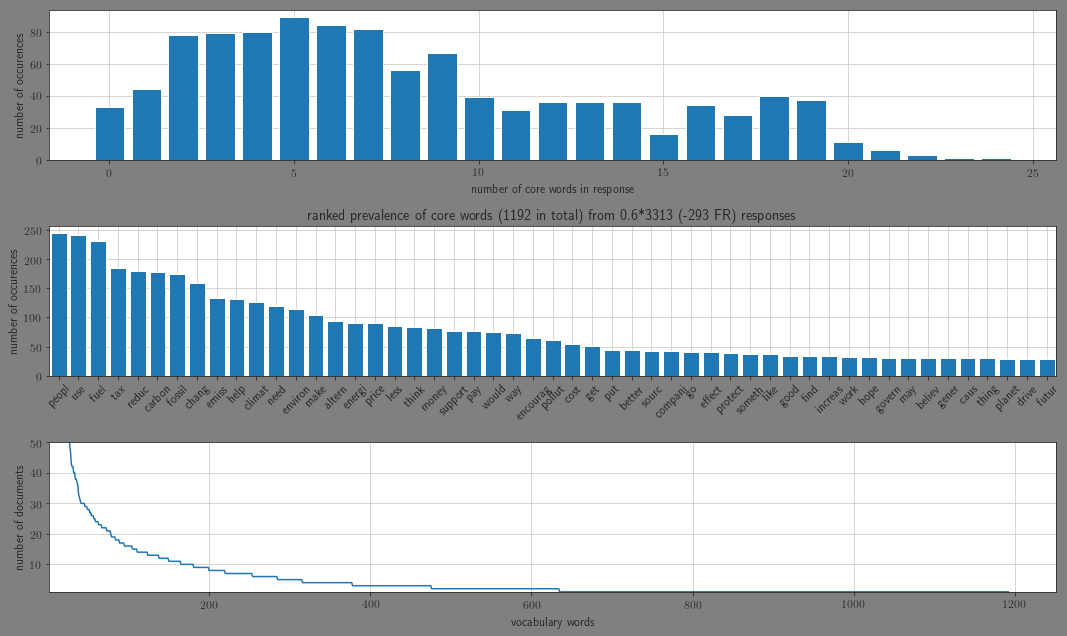

In [67]:
fig,ax=pl.subplots(3,1,figsize=(15,9))

size_counts=tdf['wordvec'].apply(len).value_counts()
ax[0].bar(size_counts.index.values,size_counts.values)
ax[0].set_ylabel('number of occurences')
ax[0].set_xlabel('number of core words in response')

ax[1].bar(word_counts.index.values,word_counts.word_count.values)
ax[1].set_ylabel('number of occurences')
ax[1].set_title('ranked prevalence of core words ('+str(len(dictionary))+' in total) from 0.6*'+str(len(df))+' (-'+str(len(french_responses))+' FR) responses')
ax[1].set_xticks(np.arange(51))
ax[1].set_xticklabels(list(dictionary.loc[word_counts.wordindex.values,'word'].values),rotation=45)
ax[1].set_xlim(-0.5,50.5)

ax[2].plot(document_occurence.index.values+1,document_occurence.word_count.values)
ax[2].set_ylabel('number of documents')
ax[2].set_ylim(1,50)
ax[2].set_xlim(1,ax[2].get_xlim()[1])
ax[2].set_xlabel('vocabulary words')
# ax[2].set_xscale('log')
# ax[2].set_yscale('log')
# ax[1].set_title('ranked prevalence of core words ('+str(len(dictionary))+' in total) from 0.6*'+str(len(df))+' (-'+str(len(french_responses))+' FR) responses')
# ax[1].set_xticks(np.arange(51))
# ax[1].set_xticklabels(list(dictionary.loc[word_counts.wordindex.values,'word'].values),rotation=45)
# ax[1].set_xlim(-0.5,50.5)

fig.tight_layout()
# fig.savefig(fig_dir+'word_prevalence.pdf',format='pdf',dpi=300,bbox_inches='tight')

Run in one function

In [50]:
wordfixfile='../../data/carbon_tax/CCOP_wave1_nonwords.csv'
english_responses=df.drop(df[df.lang=='FR'].index)
carbon_tax_question='po3a'
cdf,dictionary=clean_corpus(english_responses,carbon_tax_question,wordfixfile=wordfixfile)

In [52]:
print(len(dictionary))
dictionary.head()

1192


,word
0,abl
1,absorb
2,acceler
3,accept
4,access


In [53]:
data_df=cdf.loc[:,[carbon_tax_question,carbon_tax_question+'clean',carbon_tax_question+'clean_stems',carbon_tax_question+'clean_stems_wordvec']]
print(len(data_df))
data_df.head()

1047


,po3a,po3aclean,po3aclean_stems,po3aclean_stems_wordvec
6,It will get people to think about their consum...,"[get, people, think, consumption, perhaps, cut...","[get, peopl, think, consumpt, perhap, cut, bac...","[438, 766, 1076, 209, 770, 239, 87, 810, 635, ..."
7,Phasing out the use of fossil fuels is essenti...,"[phasing, use, fossil, fuels, essential, save,...","[phase, use, fossil, fuel, essenti, save, huma...","[776, 1131, 419, 424, 343, 930, 504, 850, 369,..."
9,People will respect it more and be less wasteful,"[people, respect, less, wasteful]","[peopl, respect, less, wast]","[766, 902, 599, 1152]"
11,I believe putting price or tax on fossil fuels...,"[believe, putting, price, tax, fossil, fuels, ...","[believ, put, price, tax, fossil, fuel, help, ...","[102, 845, 810, 1060, 419, 424, 487, 235, 368,..."
14,"As price increases, people are more open to op...","[price, increases, people, open, options, opti...","[price, increas, peopl, open, option, option, ...","[810, 534, 766, 724, 731, 731, 97, 22, 189]"


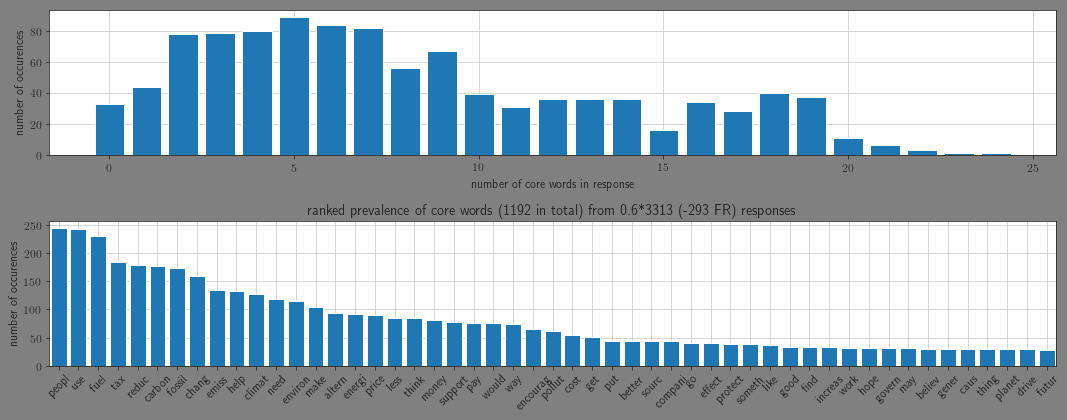

In [54]:
word_counts=data_df[carbon_tax_question+'clean_stems_wordvec'].apply(pd.Series).unstack().value_counts().sort_values(ascending=False).reset_index()
word_counts=word_counts.rename(columns={0:'word_count','index':'wordindex'})
word_counts.wordindex=word_counts.wordindex.astype(int)

fig,ax=pl.subplots(2,1,figsize=(15,6))

size_counts=data_df[carbon_tax_question+'clean_stems_wordvec'].apply(len).value_counts()
ax[0].bar(size_counts.index.values,size_counts.values)
ax[0].set_ylabel('number of occurences')
ax[0].set_xlabel('number of core words in response')

ax[1].bar(word_counts.index.values,word_counts.word_count.values)
ax[1].set_ylabel('number of occurences')
ax[1].set_title('ranked prevalence of core words ('+str(len(dictionary))+' in total) from 0.6*'+str(len(df))+' (-'+str(len(french_responses))+' FR) responses')
ax[1].set_xticks(np.arange(51))
ax[1].set_xticklabels(list(dictionary.loc[word_counts.wordindex.values,'word'].values),rotation=45)
ax[1].set_xlim(-0.5,50.5)

fig.tight_layout()
# fig.savefig(fig_dir+'word_prevalence.pdf',format='pdf',dpi=300,bbox_inches='tight')